Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 05 - Numerical integration: finite differences and Duhamel techniques

[1.   Introduction](#section_1)  
[2.   The finite differences technique](#section_2)  
[2.1. Formulation](#section_21)  
[2.2. Example](#section_22)  
[3.   The Duhamel's integral technique](#section_3)  
[3.1. Formulation](#section_31)  
[3.2. Example](#section_32)  
[4.   Example: excitation recorded as file](#section_4)  
[5.   Finite differences for nonlinear equations](#section_5)  
[6.   Assignment](#section_6)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [28]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introduction <a name="section_1"></a> 

Besides the basic conceptual solutions presented in the previous class, in practical cases
where the external force $F(t)$ is arbitrarily defined, the dynamic equilibrium equation must 
be numerically solved. 

In this class we present two of the most important integration techniques:  
* the central finite differences scheme and  
* the Duhamel integral method.   

There is also another useful technique that will be presented after we introduce the
Fourier transform and the frequency domain analysis of linear systems, in the next classes.
For the moment we can state that time domain techniques are mainly used for transient loads,
while frequency domain techniques are maily used for periodic or stationary random loads.


## 2. The finite differences technique <a name="section_2"></a> 

### 2.1. Formulation  <a name="section_21"></a> 

Although the central finite differences technique may be used to solve the dynamic 
equilibrium equation of linear systems, its most important application is in the 
solution of _nonlinear systems_. 
For linear systems it allows the integration scheme to be _explicit_, what means that the system
state (displacement) in future can be _explicitly_ stated as a function of system state in the past.
To understand this concept, let us discretize the time domain as $t_i = i \Delta t$, where $\Delta t$
is the so-called _time step_. 
This is depicted in the figure below:

<img src="images/finite_differences.jpg" alt="SDOF system" width="480px"/>

Consequently, both the sistem response, $u(t)$, as well as the external load, $F(t)$, can be 
now expressed at the discrete time instants, $t_i$, as:

\begin{align*}
 u_i &= u(t_i) \\
 F_i &= F(t_i)
\end{align*}

From this definitions, the system velocity, $\dot{u}(t)$, and acceleration, $\ddot{u}(t)$, can be
approximated through a central finite differences scheme as:

\begin{align*}
\dot{ u}_i &= \frac{1}{2\Delta t}   \left( u_{i+1} - u_{i-1}           \right) \\
\ddot{u}_i &= \frac{1}{ \Delta t^2} \left( u_{i+1} - 2u_ {i} + u_{i-1} \right) 
\end{align*}

Considering that the dynamic equilibrium equation holds also for a generic time instant $t_i$:

$$ \ddot{u}_i + 2 \zeta \omega_{\rm n} \dot{u}_i + \omega_{\rm n}^2 u_i = \frac{F_i}{m} $$

the discrete kinematic parameters $\dot{ u}_i$ and $\ddot{ u}_i$ can be replaced to give:

$$ \frac{1}{ \Delta t^2} \left( u_{i+1} - 2u_ {i} + u_{i-1} \right) +
   \frac{2 \zeta \omega_{\rm n}}{2 \Delta t} \left( u_{i+1} - u_{i-1} \right) + 
   \omega_{\rm n}^2 u_i = \frac{F_i}{m} $$

By isolating the future system displacement, $u_{i+1}$, it results:

$$ u_{i+i} = \frac{1}{\beta_1} \left( \frac{F_i}{m} + \beta_2 u{i-1} - \beta_3 u_{i} \right) $$

with:

\begin{align*}
\beta_1 &= \frac{1}{\Delta t} \left( \zeta\omega_{\rm n} + \frac{1}{\Delta t}\right) \\
\beta_2 &= \frac{1}{\Delta t} \left( \zeta\omega_{\rm n} - \frac{1}{\Delta t}\right) \\
\beta_3 &= \frac{1}{\Delta t} \left( \Delta t \omega_{\rm n}^2 - \frac{2}{\Delta t}\right) 
\end{align*}

which is an _explicit_ expression of the system response at time $t_{i+1}$ as a function 
of system responses at times $t_{i-1}$ and $t_i$.
The initial position, $u_0$, and initial velocity, $v_0 = \dot{u}_0$, must be provided for 
the calculation of system responses at instants $t_0$ and $t_1$. 
The position at $t_0$ is the provided value $u_0$ itself, while the position at $t_1$
can be calculated with:

$$ u_1 = u_0 + v_0 \Delta t + \frac{F_0 \Delta t^2}{2}$$

The finite differences technique presents a severe restriction for the (arbitrarily chosen)
time step, $\Delta t$:

$$ \Delta t \leq \frac{T_{\rm n}}{4} $$

Whenever this restriction is not respected, the integration scheme will diverge and become
unstable, leading to increasingly large response. 
Furthermore, as one tries to increase $\Delta t$ to reduce computational time, the technique 
loose accuracy quite fast.
For these reasons, Duhamel's technique presented in the next section is usually preferable 
for solving linear systems.


### 2.2. Example of application with ```MRPy```

The formulation above is implemented as a method for the  ```MRPy``` class, as exemplified
in the following example with a unit step loading.

Firstly, it is necessary to define the mechanical properties of the sdof system.
Let us assume that:


In [44]:
m  = 1.0       # system mass in kg
fn = 1.0       # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity


Once the system properties are specified, the unit step loading can be created as a ```MRPy```
instance by calling the appropriate constructor:


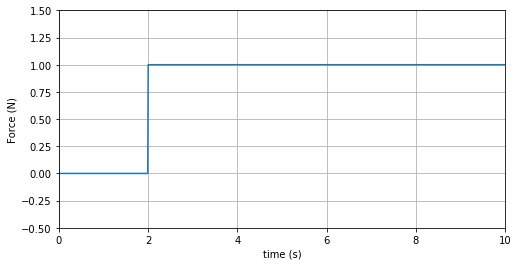

In [39]:
H  = MRPy.Heaviside(NX=1, N=1000, t0=2, Td=10)
t  = H.t_axis()

plt.figure(1, figsize=(8, 4), clear=True)
plt.plot(t, H[0])

plt.xlim(0, H.Td);     plt.xlabel('time (s)') 
plt.ylim(-0.5, 1.5);   plt.ylabel('Force (N)') 

plt.grid(True) 


Observe that the number of time steps ```N``` and the total duration ```Td``` will define the 
sampling frequency ```fs``` and the time step will be $\Delta t = 1/f_{\rm s}$.
Smaller values of ```N``` will then worse the integration accuracy for a given ```Td```.

The solution by finite differences is then available through the ```sdof_fdiff``` method:


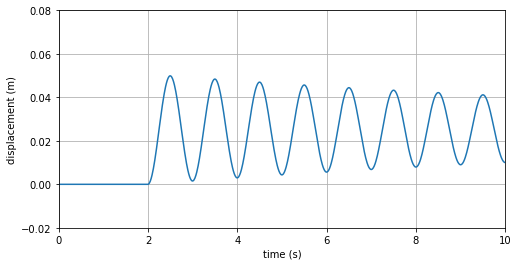

In [69]:
u_FD  = H.sdof_fdiff(fn, zt, u0, v0)
t     = u_FD.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, u_FD[0])

plt.xlim(0, u_FD.Td);   plt.xlabel('time (s)') 
plt.ylim(-0.02, 0.08);   plt.ylabel('displacement (m)') 

plt.grid(True) 


It can be clearly observed that, after the step onset, the system will oscillate
with decreasing amplitude around the static response. 
This static displacement can be calculated directly from system stiffness:


In [63]:
k    = m*(2*np.pi*fn)**2      # system stiffness from frequency formula
u_st = np.max(H)/k            # displacement for maximum applied force

print('Static displacement = {0:0.3f}m'.format(u_st))

Static displacement = 0.025m


Let us see now what happens whenever the time step is too low in comparison to the system
natural period of vibration. 


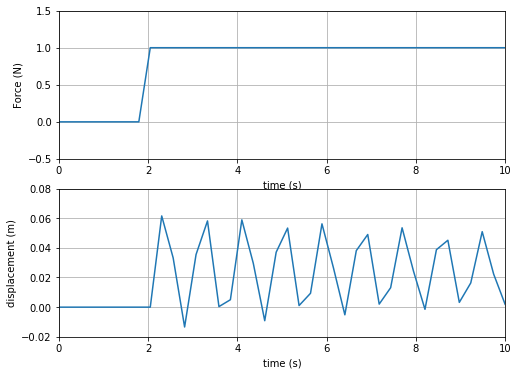

In [78]:
Tn = 1/fn           # natural period in seconds
dt = Tn/4           # very coarse time step on the verge of instability (explore this!!!)
N  = int(H.Td/dt)   # new length for the Heaviside's excitation

H2 = MRPy.Heaviside(NX=1, N=N, t0=2, Td=10)
u2 = H2.sdof_fdiff(fn, zt, u0, v0)
t2 = H2.t_axis()

plt.figure(3, figsize=(8, 6), clear=True)

plt.subplot(2,1,1)
plt.plot(t2, H2[0]);   
plt.xlim(0,  H2.Td);    plt.xlabel('time (s)') 
plt.ylim(-0.5, 1.5);    plt.ylabel('Force (N)') 
plt.grid(True) 

plt.subplot(2,1,2)
plt.plot(t2, u2[0]);   
plt.xlim(0,  u2.Td);    plt.xlabel('time (s)') 
plt.ylim(-0.02, 0.08);  plt.ylabel('displacement (m)') 
plt.grid(True) 


To make full use of the Jupyter notebook concept, try now changing the fraction of 
$T_{\rm n}$ used to define the time step in the example above. 
What is the worst acceptable accuracy?


## 3. The Duhamel's integral technique <a name="section_3"></a> 


### 3.1. Formulation <a name="section_31"></a> 

The numerical solution by the Duhamel's integral technique is restricted to linear systems.
It relies on the superposition of the system response to a sequence on impulses $p(\tau) d\tau$,
as illustrated in the figure below.

<img src="images/duhamel.png" alt="SDOF system" width="480px"/>




### 3.2. Example of application with ```MRPy```

The formulation above is also implemented as a method for the  ```MRPy``` class, as exemplified
in the following.
The same system properties and unit step loading from previous example are used.
The class method is:



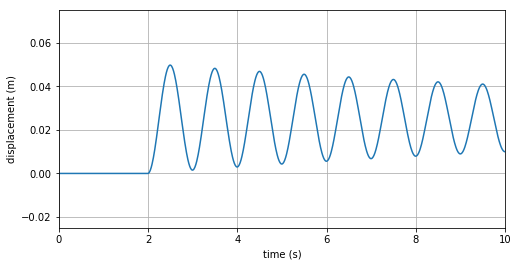

In [79]:
u_DH = H.sdof_Duhamel(fn, zt, u0, v0)
t    = u_DH.t_axis()

plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, u_DH[0])

plt.xlim(0, u_DH.Td);      plt.xlabel('time (s)') 
plt.ylim(-0.025, 0.075);   plt.ylabel('displacement (m)') 

plt.grid(True) 


## 4. Example: excitation recorded as file <a name="section_4"></a> 



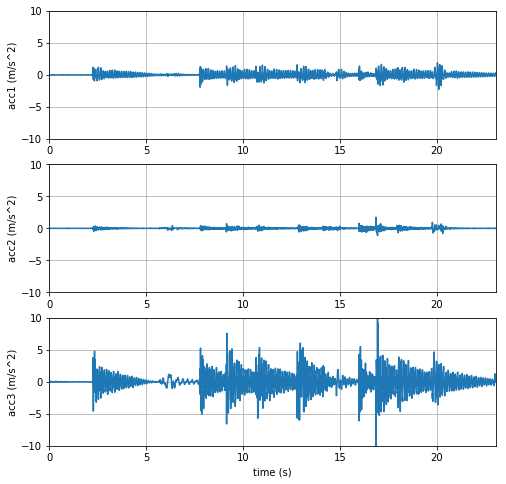

In [81]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(5, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-10, 10);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


 Defining system properties:


Integrating by finite differences



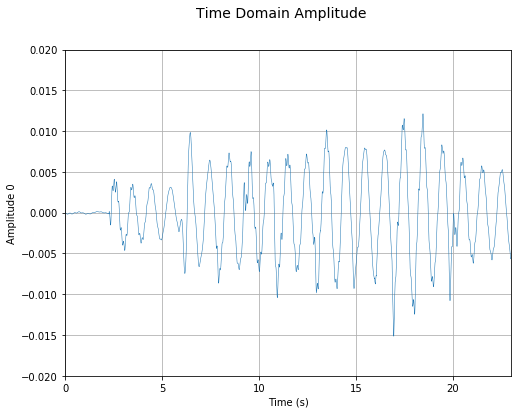

In [14]:
ufd = az.sdof_fdiff(fn, zt, u0, v0)
f2  = ufd.plot_time(fig=2, figsize=(8, 6), axis_t=[0, ufd.Td, -0.02, +0.02])


Integrating by Duhamel:


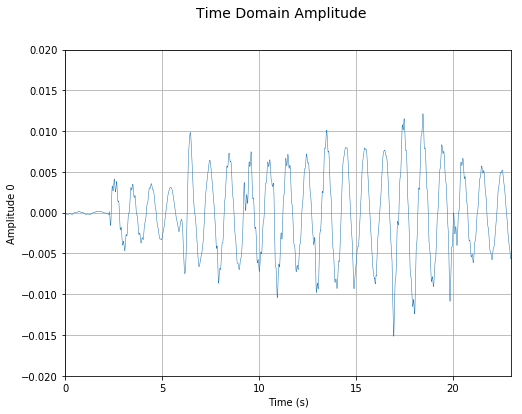

In [15]:
udh = az.sdof_Duhamel(fn, zt, u0, v0)
f3  = udh.plot_time(fig=2, figsize=(8, 6), axis_t=[0, udh.Td, -0.02, +0.02])


Integration error:



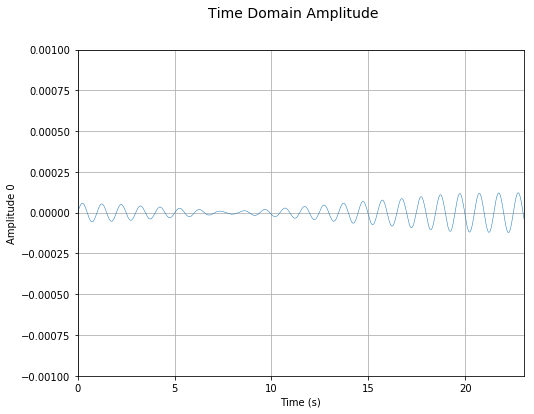

In [16]:
err = ufd - udh
f3  = err.plot_time(fig=2, figsize=(8, 6), axis_t=[0, err.Td, -0.001, +0.001])


## 5. Finite differences for nonlinear equations <a name="section_5"></a> 



## 6. Assignment <a name="section_6"></a> 

